In [112]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

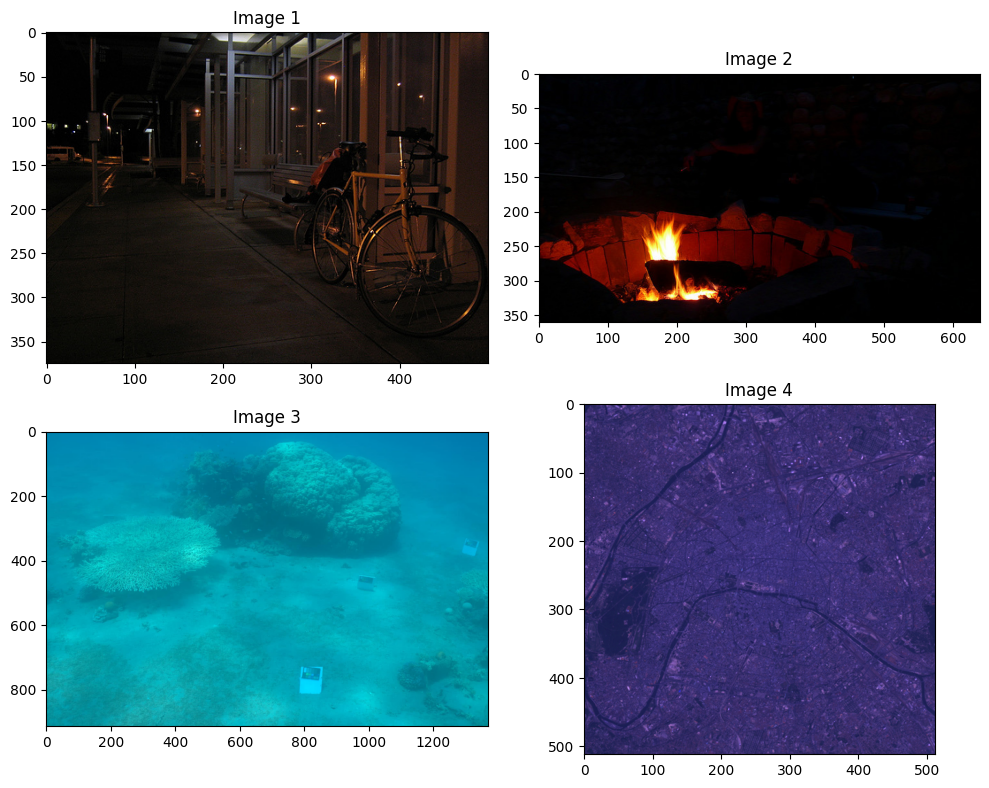

In [113]:
# Images
imagenes = ["image1.png", "image2.jpg", "image3.jpg", "image4.tif"]

# Number of rows and columns in the subplot grid
num_rows = 2
num_cols = 2

# Create a subplot with the specified number of rows and columns
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 8))

# Read and display each image in the subplot
for i, img_path in enumerate(imagenes):
    # Read the image
    image = cv2.imread(img_path)

    # Check if the image was successfully loaded
    if image is None:
        print(f"Error: Unable to load the image from {img_path}")
    else:
        # Determine the position in the subplot grid
        row = i // num_cols
        col = i % num_cols

        # Display the image in the specified subplot position
        axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axs[row, col].set_title(f'Image {i + 1}')

# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the subplot
plt.show()


In [114]:
# # Read an image from file
# image = cv2.imread("image1.png")

# # Check if the image was successfully loaded
# if image is None:
#     print(f"Error: Unable to load the image from")
# else:
#     # Display the image using OpenCV
#     # cv2.imshow('Image', image)
#     # cv2.waitKey(0)  # Wait until a key is pressed 
#     # cv2.destroyAllWindows()

#     # Alternatively, display the image using Matplotlib
#     plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
#     plt.title('Image')
#     plt.show()

# Funciones de transformación o ajuste de la intensidad

### Transformación Lineal

En una transformación lineal, los parámetros principales que puedes modificar son \( \alpha \) y \( \beta \), que controlan el contraste y el brillo de la imagen, respectivamente. La fórmula general para la transformación lineal es:

\[ \text{{pixel\_transformado}} = \alpha \cdot \text{{pixel\_original}} + \beta \]

#### Ajuste de \( \alpha \) y \( \beta \):

1. **Ajuste de \( \alpha \) (Contraste):**
   - \( \alpha \) controla el contraste de la imagen.
   - Si \( \alpha = 1 \), la imagen permanece sin cambios.
   - \( \alpha > 1 \) aumenta el contraste.
   - \( 0 < \alpha < 1 \) disminuye el contraste.

2. **Ajuste de \( \beta \) (Brillo):**
   - \( \beta \) controla el brillo de la imagen.
   - Si \( \beta = 0 \), el brillo permanece sin cambios.
   - \( \beta > 0 \) aumenta el brillo.
   - \( \beta < 0 \) disminuye el brillo.

#### Utilidad de la Transformación Lineal:

La transformación lineal es útil para ajustar la apariencia visual de una imagen. Puedes resaltar características específicas al aumentar el contraste o mejorar la visibilidad ajustando el brillo. Es comúnmente utilizado en procesamiento de imágenes para mejorar la calidad visual y realzar detalles.

En el código proporcionado anteriormente, los valores de \( \alpha \) y \( \beta \) se pueden ajustar según tus necesidades. La transformación lineal se aplica a cada píxel de la imagen, proporcionando un control flexible sobre el contraste y el brillo.


In [115]:
def apply_linear_transformation(image_path, alpha, beta):
    # Leer la imagen desde un archivo
    image = cv2.imread(image_path)

    # Verificar si la imagen se cargó correctamente
    if image is None:
        print(f"Error: No se pudo cargar la imagen desde {image_path}")
        return

    # Cambiar la intensidad del color (aumentar el brillo)
    brightened_image = cv2.addWeighted(image, 1, np.zeros_like(image), 0, beta)

    # Ajustar el contraste (usando alpha y beta)
    contrast = cv2.addWeighted(image, alpha, np.zeros_like(image), 0, 0)

    # Ajustar el brillo y contraste (usando alpha y beta)
    adjusted_image = cv2.addWeighted(image, alpha, np.zeros_like(image), 0, beta)

    # Mostrar las imágenes originales y transformadas
    plt.figure(figsize=(14, 8))
    plt.subplot(1, 4, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Imagen Original')
    plt.subplot(1, 4, 2), plt.imshow(cv2.cvtColor(contrast, cv2.COLOR_BGR2RGB)), plt.title('Contraste Modificado')
    plt.subplot(1, 4, 3), plt.imshow(cv2.cvtColor(brightened_image, cv2.COLOR_BGR2RGB)), plt.title('Brillo Modificado')
    plt.subplot(1, 4, 4), plt.imshow(cv2.cvtColor(adjusted_image, cv2.COLOR_BGR2RGB)), plt.title('Brillo y Contraste Ajustados')
    plt.show()

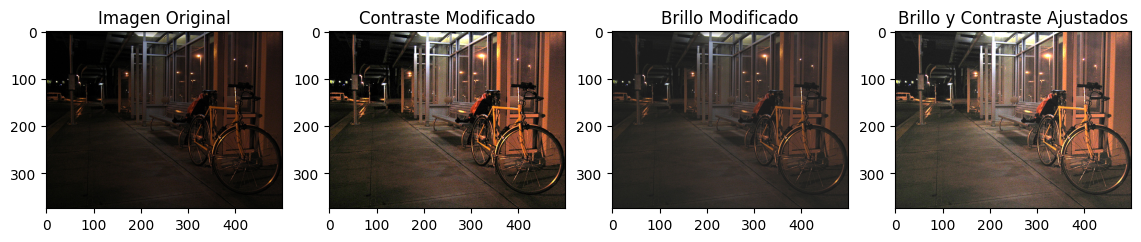

In [116]:
#                          (imagen,contraste,brillo)
apply_linear_transformation(imagenes[0],2.5,25)

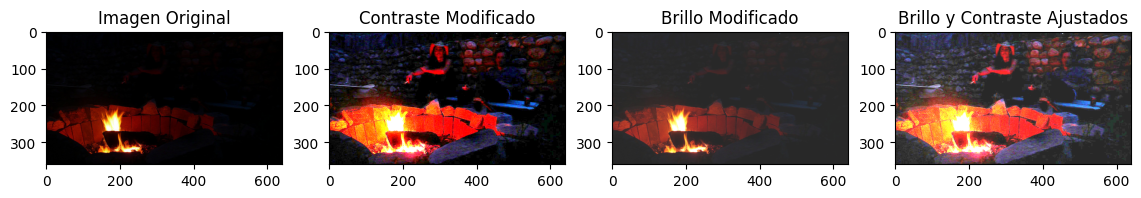

In [117]:
#                          (imagen,contraste,brillo)
apply_linear_transformation(imagenes[1],10,40)

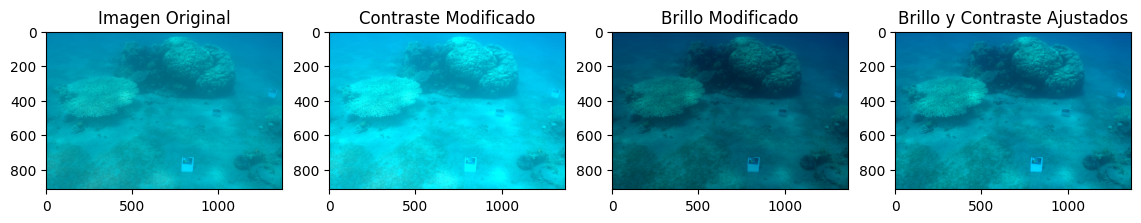

In [118]:
#                          (imagen,contraste,brillo)
apply_linear_transformation(imagenes[2],1.3,-70)

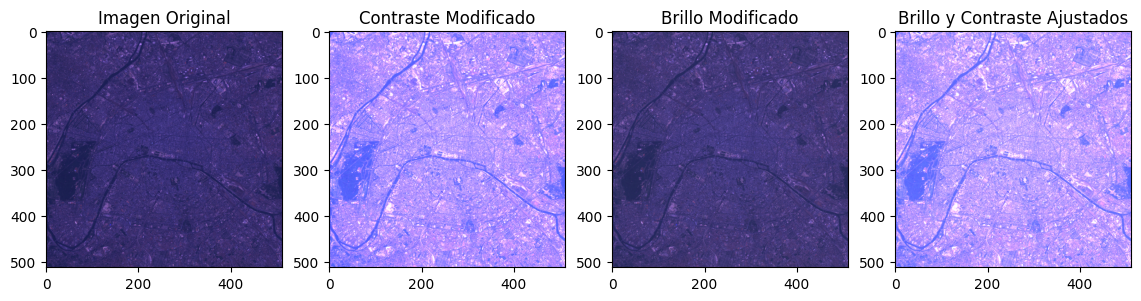

In [119]:
apply_linear_transformation(imagenes[3],3.1,10)

### Transformación Logarítmica

En una transformación logarítmica, el parámetro principal que puedes modificar es la constante de ajuste, que generalmente se suma al valor del píxel antes de aplicar el logaritmo. La fórmula general para la transformación logarítmica es:

\[ \text{{pixel\_transformado}} = c \cdot \log(1 + \text{{pixel\_original}}) \]

- \(c\) es la constante de ajuste.
- \(\log\) es la función logaritmo natural.

#### Ajuste de \(c\):

1. **Pequeño valor de \(c\):**
   - La transformación logarítmica tiene menos efecto en píxeles de baja intensidad.
   - Adecuado para imágenes con contenido más uniforme en la región de baja intensidad.

2. **Valor grande de \(c\):**
   - La transformación logarítmica tiene un mayor efecto en píxeles de baja intensidad.
   - Puede ser útil para resaltar detalles en áreas más oscuras de la imagen.

En el código proporcionado anteriormente, la función `np.log1p` se utiliza en lugar de `np.log` para evitar problemas con el logaritmo de cero. La función `np.log1p` calcula el logaritmo natural de \(1 + x\), donde \(x\) es el valor de cada píxel.

### Utilidad de la Transformación Logarítmica:

La transformación logarítmica es útil en imágenes con un rango dinámico amplio, especialmente cuando hay detalles importantes en las regiones de baja intensidad. Puede mejorar la visualización de detalles en áreas oscuras y resaltar características que no son fácilmente perceptibles en la imagen original.

En resumen, el ajuste de la constante \(c\) en la transformación logarítmica permite personalizar la intensidad de realce aplicada a las regiones de baja intensidad, lo que puede ser beneficioso para mejorar la visibilidad de detalles en ciertos tipos de imágenes.


In [120]:
def apply_logarithmic_transformation(image_path):
    # Leer la imagen desde un archivo
    image = cv2.imread(image_path)

    # Verificar si la imagen se cargó correctamente
    if image is None:
        print(f"Error: No se pudo cargar la imagen desde {image_path}")
        return

    # # Convertir la imagen a escala de grises si es a color
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Aplicar la transformación logarítmica
    log_transformed_image = np.log1p(image.astype(float))

    # Normalizar la imagen transformada antes de mostrarla
    log_transformed_image_normalized = (255 * (log_transformed_image - np.min(log_transformed_image)) / (np.max(log_transformed_image) - np.min(log_transformed_image))).astype(np.uint8)

    # Mostrar las imágenes originales y transformadas
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Imagen Original')
    # plt.subplot(1, 2, 1), plt.imshow(image), plt.title('Imagen Original')
    plt.subplot(1, 2, 2), plt.imshow(log_transformed_image_normalized, cmap='gray'), plt.title('Transformación Logarítmica')
    plt.show()

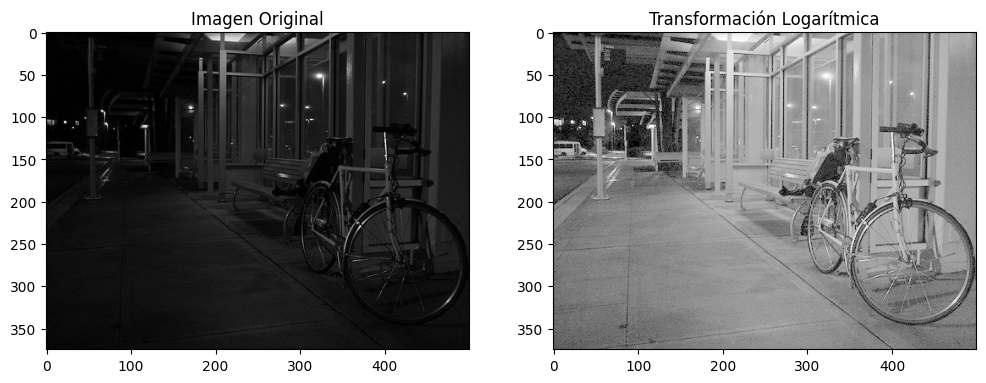

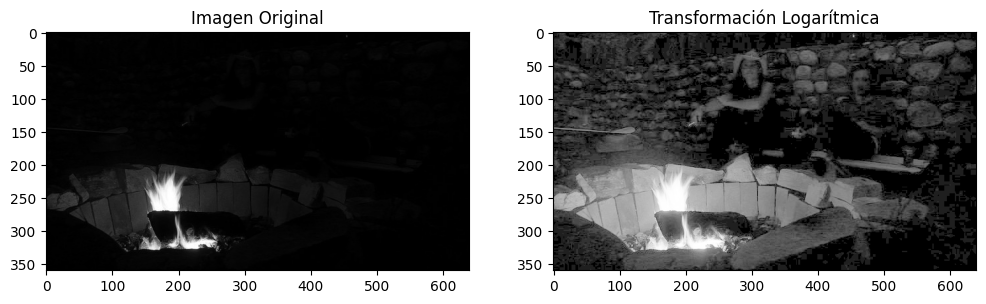

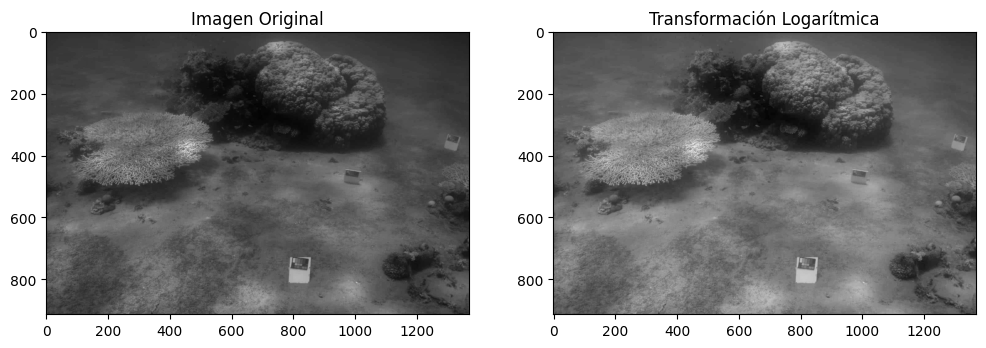

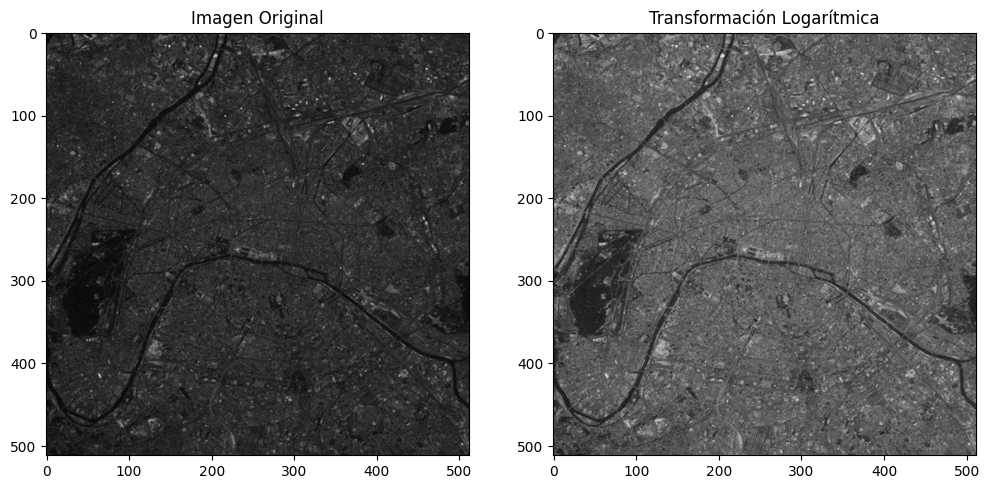

In [121]:
for i in imagenes:
    apply_logarithmic_transformation(i) 

### Transformación Exponencial en Imágenes

La transformación exponencial es una operación en el dominio de la intensidad de las imágenes que ajusta la distribución de los niveles de gris aplicando una función exponencial a cada píxel de la imagen. La fórmula general de la transformación exponencial es:

\[ \text{{pixel\_transformado}} = I^{\gamma} \]

Donde:
- \( I \) es el valor del píxel original.
- \( \gamma \) es el parámetro de la transformación exponencial. Ajustar este parámetro afectará cómo se expanden o contraen los valores de intensidad en la imagen resultante.


#### Elección del Valor de Gamma (\( \gamma \)) en la Transformación Exponencial

La elección del valor de gamma (\( \gamma \)) en la transformación exponencial depende del efecto que desees lograr en la imagen. Aquí hay algunas consideraciones generales:

1. **\( \gamma > 1 \): Aumento del Contraste en Sombras:**
   - Un valor de \( \gamma \) mayor que 1 aumentará la intensidad en las regiones más oscuras de la imagen, resaltando detalles en las sombras.
   - Puede ser útil para imágenes donde los detalles en áreas de baja intensidad son importantes.

2. **\( \gamma < 1 \): Disminución del Contraste en Sombras:**
   - Un valor de \( \gamma \) menor que 1 disminuirá la intensidad en las regiones más oscuras, suavizando las sombras y resaltando áreas más brillantes.
   - Útil para reducir el contraste en áreas de baja intensidad.

3. **\( \gamma = 1 \): Sin Cambio en la Intensidad:**
   - Un valor de \( \gamma \) igual a 1 no produce cambios en la intensidad de la imagen. La imagen resultante será idéntica a la original.

4. **Ajuste Empírico:**
   - En muchos casos, el valor de \( \gamma \) se ajusta empíricamente según la apariencia visual deseada. Prueba diferentes valores y observa cómo afectan la imagen.


In [122]:
def apply_exponential_transformation(image_path, gamma):
    # Leer la imagen desde un archivo
    image = cv2.imread(image_path)

    # Verificar si la imagen se cargó correctamente
    if image is None:
        print(f"Error: No se pudo cargar la imagen desde {image_path}")
        return

    # Convertir la imagen a escala de grises si es a color
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Aplicar la transformación exponencial
    exponential_transformed_image = np.power(image, gamma)

    # Normalizar la imagen transformada antes de mostrarla
    exponential_transformed_image_normalized = (255 * (exponential_transformed_image - np.min(exponential_transformed_image)) / (np.max(exponential_transformed_image) - np.min(exponential_transformed_image))).astype(np.uint8)

    # Mostrar las imágenes originales y transformadas
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Imagen Original')
    # plt.subplot(1, 2, 1), plt.imshow(image), plt.title('Imagen Original')
    plt.subplot(1, 2, 2), plt.imshow(exponential_transformed_image_normalized, cmap='gray'), plt.title('Transformación Exponencial (gamma=' + str(gamma) + ')')
    plt.show()

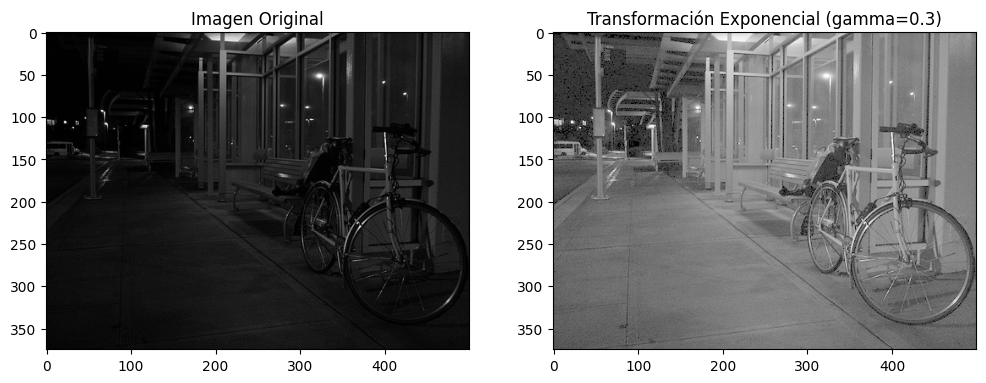

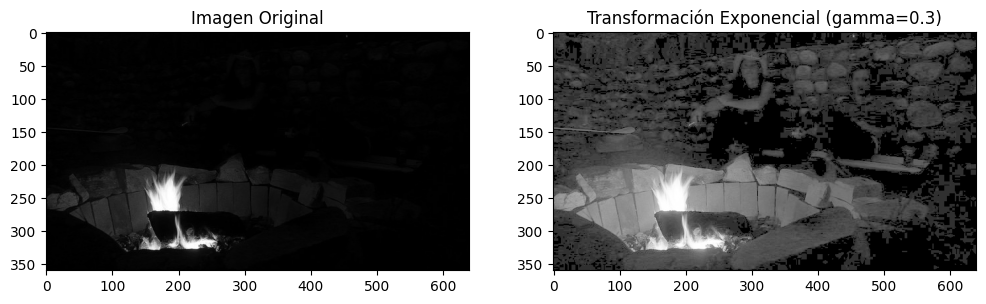

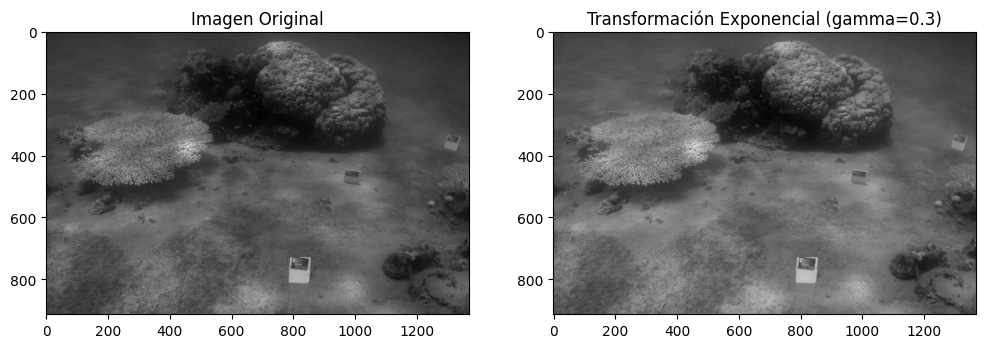

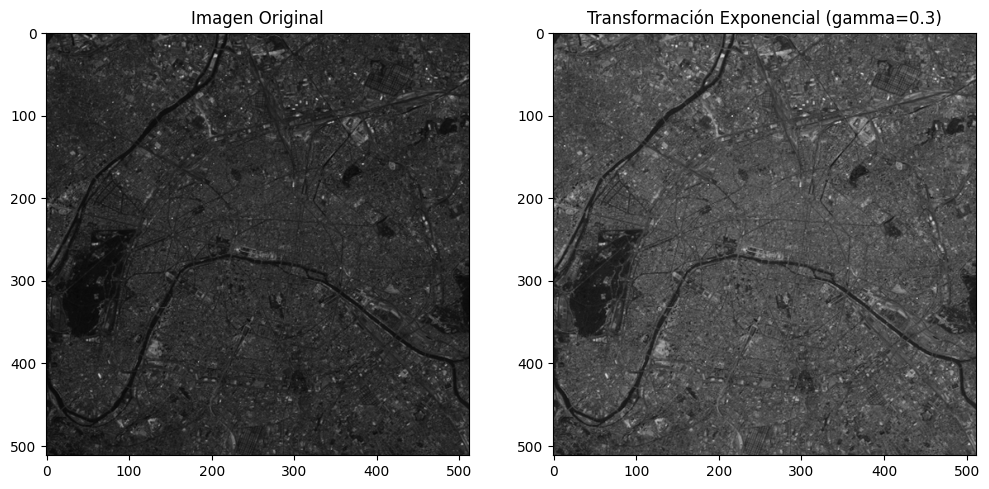

In [123]:
for i in imagenes:
    apply_exponential_transformation(i, 0.3) 

#### Razones para Convertir Imágenes a Escala de Grises antes de Aplicar Transformaciones Logarítmicas y Exponenciales

1. **Conveniencia Matemática:**
   - Las transformaciones logarítmicas y exponenciales son más convenientes de aplicar directamente a los valores de intensidad en una única banda (escala de grises) en lugar de a cada canal de color por separado.

2. **Propósito de las Transformaciones:**
   - Estas transformaciones están diseñadas para ajustar la distribución de intensidad de la imagen. Al aplicarse a una imagen en escala de grises, se enfoca en cómo cambian los niveles de gris en la imagen.

3. **Sensibilidad a la Luminosidad:**
   - Las transformaciones logarítmicas y exponenciales son útiles para mejorar detalles en áreas de baja intensidad. En una imagen a color, la luminosidad de un píxel puede depender de los componentes de color RGB, y aplicar estas transformaciones directamente a los canales de color podría no tener el efecto deseado.

4. **Simplicidad y Claridad del Código:**
   - Convertir la imagen a escala de grises simplifica el código y lo hace más claro. Esto evita decisiones adicionales sobre cómo manejar los canales de color al aplicar las transformaciones.

Dicho esto, si tu imagen ya está en escala de grises, puedes omitir la conversión y aplicar directamente las transformaciones.

# Operaciones aritméticas

In [124]:
def apply_arithmetic_operations(operation, image_path1, image_path2):
    # Leer las imágenes desde archivos
    image1 = cv2.imread(image_path1)
    image2 = cv2.imread(image_path2)
    # operaciones = ['suma', 'resta']
    # Verificar si las imágenes se cargaron correctamente
    if image1 is None or image2 is None:
        print(f"Error: No se pudieron cargar las imágenes")
        return

    # Ajustar el tamaño de las imágenes para que sean del mismo tamaño
    image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]))

    # Aplicar operadores aritméticos
    # Suma de imágenes
    if operation == 'suma':
        added_image = cv2.add(image1, image2)

        # Mostrar las imágenes originales y transformadas
        plt.figure(figsize=(18, 6))
        plt.subplot(1, 3, 1), plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)), plt.title('Imagen 1')
        plt.subplot(1, 3, 2), plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)), plt.title('Imagen 2')
        plt.subplot(1, 3, 3), plt.imshow(cv2.cvtColor(added_image, cv2.COLOR_BGR2RGB)), plt.title('Suma de Imágenes')
        plt.show()

    # Resta de imágenes
    if operation == 'resta':
        subtracted_image = cv2.subtract(image1, image2)
        
        # Mostrar las imágenes originales y transformadas
        plt.figure(figsize=(18, 6))
        plt.subplot(1, 3, 1), plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)), plt.title('Imagen 1')
        plt.subplot(1, 3, 2), plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)), plt.title('Imagen 2')
        plt.subplot(1, 3, 3), plt.imshow(cv2.cvtColor(subtracted_image, cv2.COLOR_BGR2RGB)), plt.title('Resta de Imágenes')
        plt.show()

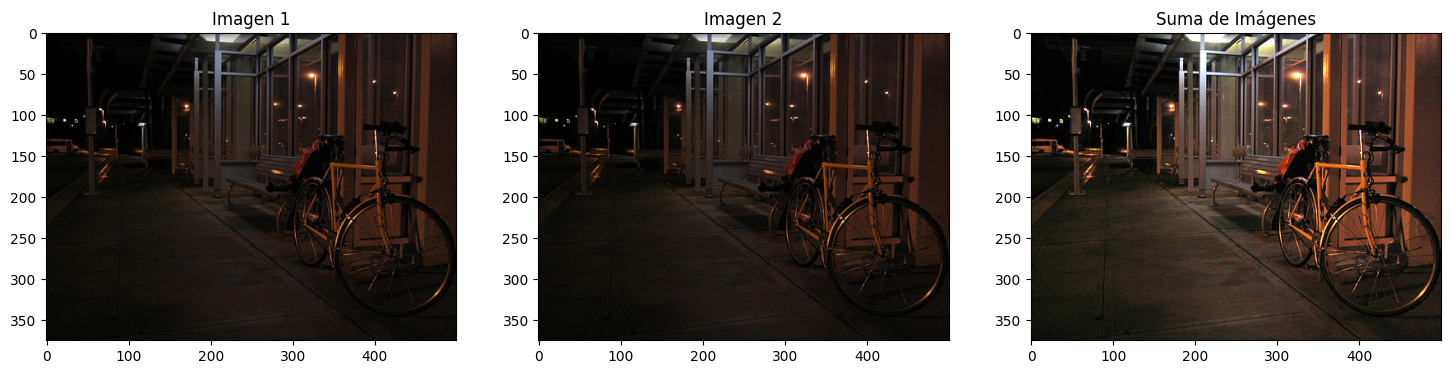

In [125]:
apply_arithmetic_operations('suma',imagenes[0], imagenes[0])

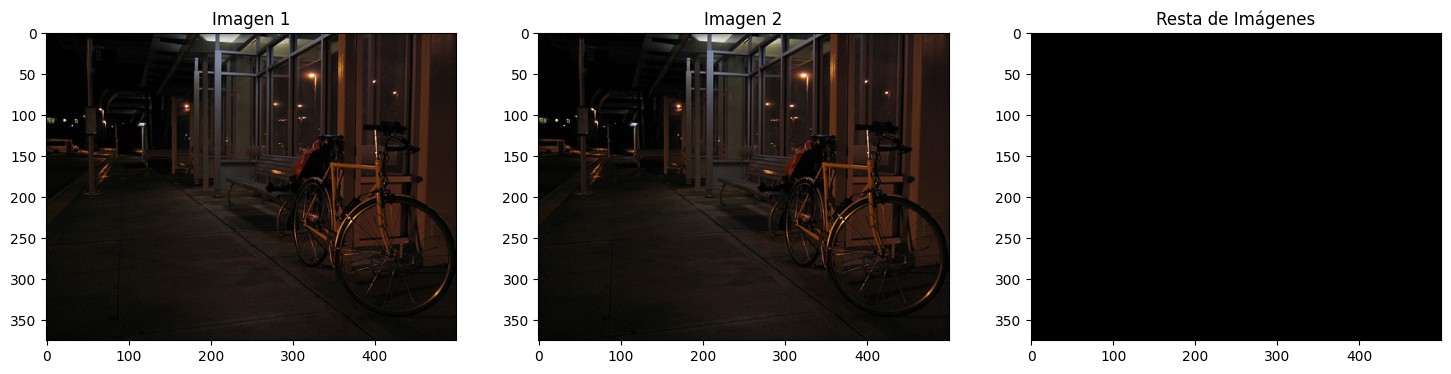

In [126]:
apply_arithmetic_operations('resta',imagenes[0], imagenes[0])

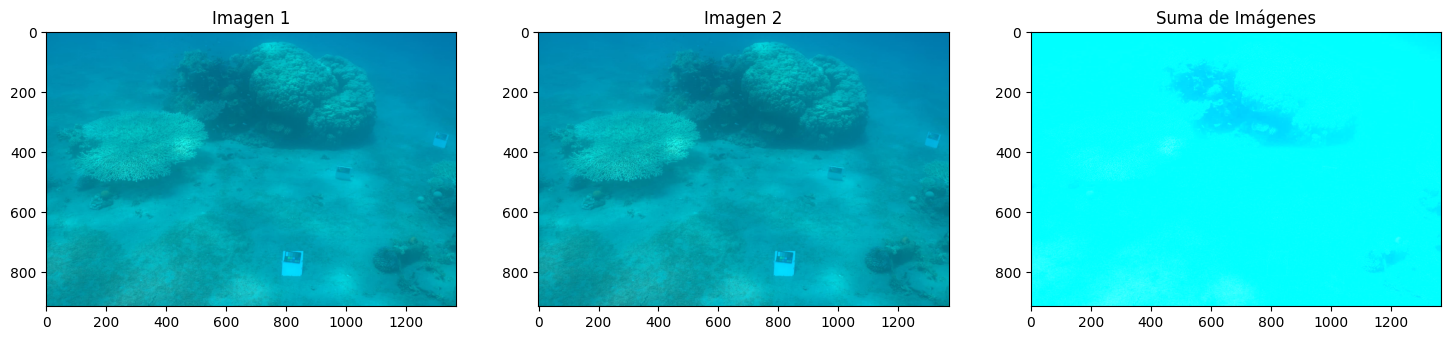

In [127]:
apply_arithmetic_operations('suma', imagenes[2], imagenes[2])

# Procesamiento del histograma

In [128]:
def apply_gaussian_and_histogram_equalization(image_path, kernel_size=(5, 5), sigma=0):
    # Leer la imagen desde un archivo
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Verificar si la imagen se cargó correctamente
    if image is None:
        print(f"Error: No se pudo cargar la imagen desde {image_path}")
        return

    # Aplicar filtro gaussiano para suavizar la imagen
    blurred_image = cv2.GaussianBlur(image, kernel_size, sigma)

    # Aplicar la ecualización del histograma
    equalized_image = cv2.equalizeHist(blurred_image)

    # Mostrar las imágenes originales y transformadas
    plt.figure(figsize=(18, 6))

    plt.subplot(1, 3, 1), plt.imshow(image), plt.title('Imagen Original')
    plt.subplot(1, 3, 2), plt.imshow(blurred_image), plt.title('Filtro Gaussiano')
    plt.subplot(1, 3, 3), plt.imshow(equalized_image), plt.title('Ecualización del Histograma')
    plt.show()

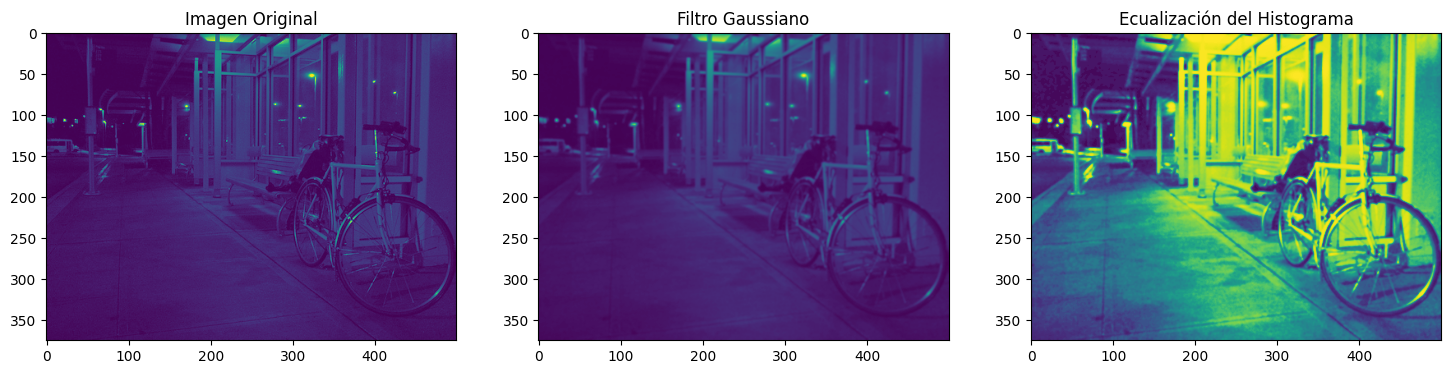

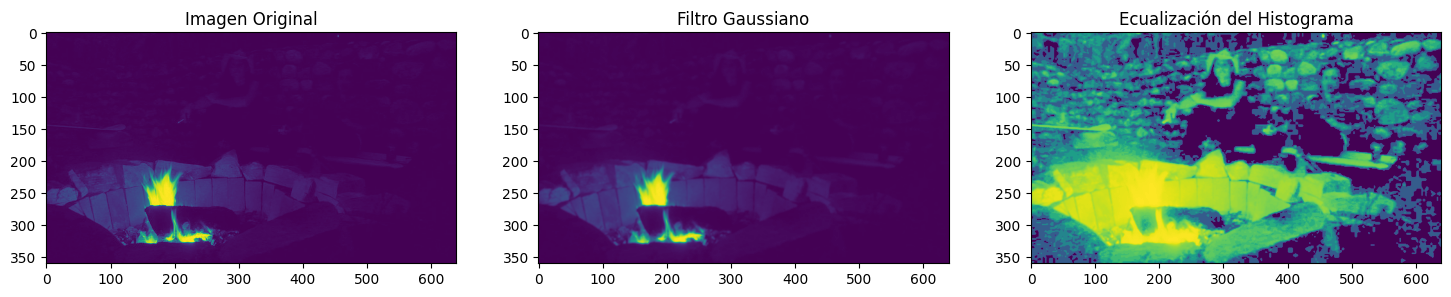

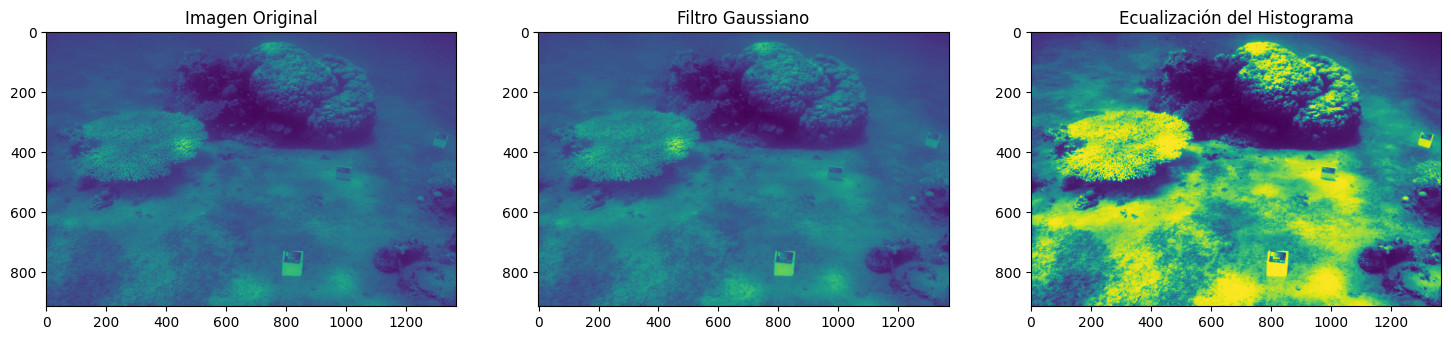

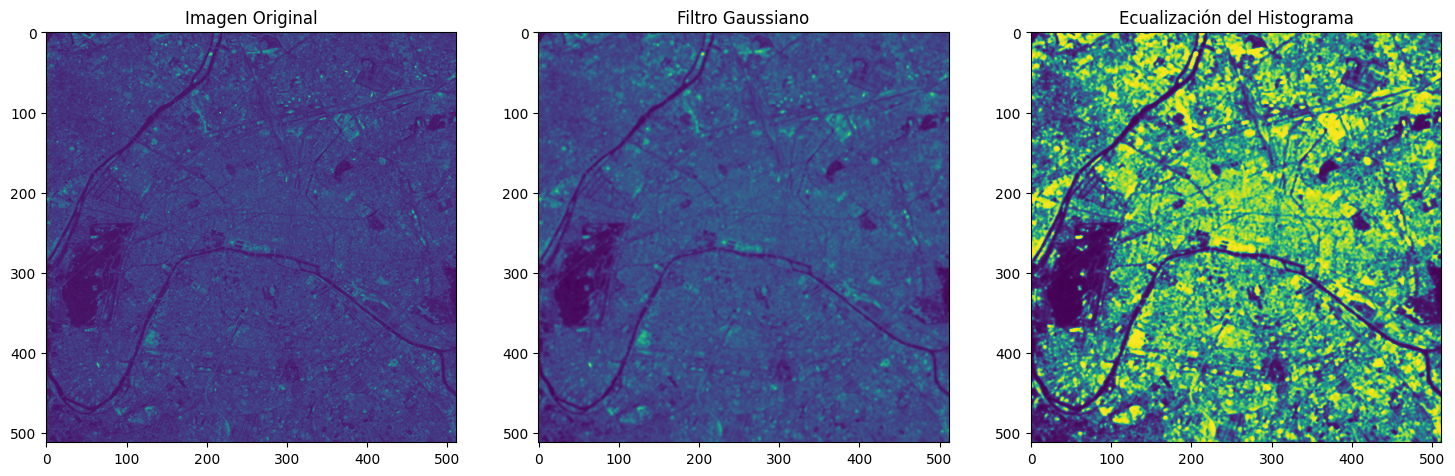

In [129]:
for i in imagenes:
    apply_gaussian_and_histogram_equalization(i) 